In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!nvidia-smi

Wed Aug  9 12:26:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
pwd

'/content'

In [2]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!pwd

/content


In [ ]:
from PIL import Image
import io

In [ ]:
print("Number of training flood images", len(os.listdir("/content/drive/MyDrive/Dataset/Train/Labeled/Flooded/image/")))
print("Number of training non-flood images", len(os.listdir("/content/drive/MyDrive/Dataset/Train/Labeled/Non-Flooded/image")))

Number of training flood images 51
Number of training non-flood images 347


In [ ]:
print("Number of unlabelled images", len(os.listdir("/content/drive/MyDrive/Dataset/Train/Unlabeled/image/")))

Number of unlabelled images 1047


In [ ]:
print("Number of Test images", len(os.listdir("/content/drive/MyDrive/Dataset/Test/image/")))

Number of Test images 448


In [ ]:
print("Number of Validation images", len(os.listdir("/content/drive/MyDrive/Dataset/Validation/image/")))

Number of Validation images 450


In [ ]:
train_dir = "/content/drive/MyDrive/Dataset/Train/Labeled"
test_dir = "/content/drive/MyDrive/Dataset/Test"
val_dir = "/content/drive/MyDrive/Dataset/Validation"

In [ ]:
!pip install tensorflow

In [2]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [5]:
pwd

'/content/drive'

In [7]:
cd ..

/content


## **Cloning TFOD 2.0 Github**

In [3]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 87135, done.
remote: Counting objects: 100% (889/889), done.
remote: Compressing objects: 100% (405/405), done.
remote: Total 87135 (delta 531), reused 801 (delta 476), pack-reused 86246
Receiving objects: 100% (87135/87135), 599.11 MiB | 16.83 MiB/s, done.
Resolving deltas: 100% (62405/62405), done.
Updating files: 100% (3563/3563), done.


In [4]:
pwd

'/content/drive/MyDrive'

In [6]:
cd /content/drive/MyDrive/models/research

/content/drive/MyDrive/models/research


In [7]:
pwd

'/content/drive/MyDrive/models/research'

In [8]:
!protoc object_detection/protos/*.proto --python_out=.

In [9]:
!git clone https://github.com/cocodataset/cocoapi.git


Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 12.36 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [10]:
cd cocoapi/PythonAPI

/content/drive/MyDrive/models/research/cocoapi/PythonAPI


In [11]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/drive/MyDrive/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-cpython-310
creating build/temp.linux-x86_64-cpython-310/pycocotools
x86_64-linux-gnu-gcc -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -fPIC -I/usr/local/lib/python3.10/dist-packages/numpy/core/include -I../common -I/usr/include/python3.10 -c ../common/maskApi.c -o build/temp.linux-x86_64-cpython-310/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
..

In [12]:
cp -r pycocotools /content/drive/MyDrive/models/research

### Install the Object Detection API

In [13]:
cd ..

/content/drive/MyDrive/models/research/cocoapi


In [14]:
cd ..

/content/drive/MyDrive/models/research


In [15]:
cp object_detection/packages/tf2/setup.py .

In [16]:
!python -m pip install .

Processing /content/drive/MyDrive/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.6/28.6 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 29.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 112.8 

In [17]:
# From within TensorFlow/models/research/
!python object_detection/builders/model_builder_tf2_test.py

2023-08-15 15:28:12.244476: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-15 15:28:13.499241: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-15 15:28:17.711271: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-15 15:28:18.297358: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returnin

In [23]:
cd /content/drive/MyDrive/trainingdemo/pre-trained-models

/content/drive/MyDrive/trainingdemo/pre-trained-models


## SSD ResNet101 V1 FPN 640x640 (RetinaNet101)

In [24]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz

--2023-08-15 15:42:59--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.12.128, 2404:6800:4003:c04::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.12.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 386527459 (369M) [application/x-tar]
Saving to: ‘ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet101_v1_fp 100%[===================>] 368.62M  67.2MB/s    in 5.6s    

2023-08-15 15:43:05 (65.5 MB/s) - ‘ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [386527459/386527459]



In [25]:
!tar -xvf ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz

ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/pipeline.config
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/assets/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index


## CenterNet Resnet50 V1 FPN Keypoints 512x512

In [26]:
! wget http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_resnet101_v1_fpn_512x512_coco17_tpu-8.tar.gz

--2023-08-15 15:43:44--  http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_resnet101_v1_fpn_512x512_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.200.128, 2404:6800:4003:c04::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.200.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 345992335 (330M) [application/x-tar]
Saving to: ‘centernet_resnet101_v1_fpn_512x512_coco17_tpu-8.tar.gz’

centernet_resnet101 100%[===================>] 329.96M  57.1MB/s    in 6.2s    

2023-08-15 15:43:51 (53.6 MB/s) - ‘centernet_resnet101_v1_fpn_512x512_coco17_tpu-8.tar.gz’ saved [345992335/345992335]



In [27]:
!tar -xvf centernet_resnet101_v1_fpn_512x512_coco17_tpu-8.tar.gz

centernet_resnet101_v1_fpn_512x512_coco17_tpu-8/
centernet_resnet101_v1_fpn_512x512_coco17_tpu-8/checkpoint/
centernet_resnet101_v1_fpn_512x512_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
centernet_resnet101_v1_fpn_512x512_coco17_tpu-8/checkpoint/checkpoint
centernet_resnet101_v1_fpn_512x512_coco17_tpu-8/checkpoint/ckpt-0.index
centernet_resnet101_v1_fpn_512x512_coco17_tpu-8/pipeline.config
centernet_resnet101_v1_fpn_512x512_coco17_tpu-8/saved_model/
centernet_resnet101_v1_fpn_512x512_coco17_tpu-8/saved_model/saved_model.pb
centernet_resnet101_v1_fpn_512x512_coco17_tpu-8/saved_model/variables/
centernet_resnet101_v1_fpn_512x512_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
centernet_resnet101_v1_fpn_512x512_coco17_tpu-8/saved_model/variables/variables.index


## EfficientDet D2 768x768


In [28]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d2_coco17_tpu-32.tar.gz

--2023-08-15 15:44:09--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d2_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.200.128, 2404:6800:4003:c04::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.200.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62929273 (60M) [application/x-tar]
Saving to: ‘efficientdet_d2_coco17_tpu-32.tar.gz’

efficientdet_d2_coc 100%[===================>]  60.01M  32.8MB/s    in 1.8s    

2023-08-15 15:44:12 (32.8 MB/s) - ‘efficientdet_d2_coco17_tpu-32.tar.gz’ saved [62929273/62929273]



In [29]:
!tar -xvf efficientdet_d2_coco17_tpu-32.tar.gz

efficientdet_d2_coco17_tpu-32/
efficientdet_d2_coco17_tpu-32/checkpoint/
efficientdet_d2_coco17_tpu-32/checkpoint/ckpt-0.data-00000-of-00001
efficientdet_d2_coco17_tpu-32/checkpoint/checkpoint
efficientdet_d2_coco17_tpu-32/checkpoint/ckpt-0.index
efficientdet_d2_coco17_tpu-32/pipeline.config
efficientdet_d2_coco17_tpu-32/saved_model/
efficientdet_d2_coco17_tpu-32/saved_model/saved_model.pb
efficientdet_d2_coco17_tpu-32/saved_model/assets/
efficientdet_d2_coco17_tpu-32/saved_model/variables/
efficientdet_d2_coco17_tpu-32/saved_model/variables/variables.data-00000-of-00001
efficientdet_d2_coco17_tpu-32/saved_model/variables/variables.index


In [30]:
cd ..

/content/drive/MyDrive/trainingdemo


In [31]:
ls

annotations/                generate_tfrecord.py  models/
exporter_main_v2.py         images/               pre-trained-models/
export_tflite_graph_tf2.py  model_main_tf2.py


In [33]:
# Create train data:
!python generate_tfrecord.py -x /content/drive/MyDrive/trainingdemo/images/train -l /content/drive/MyDrive/trainingdemo/annotations/label_map.pbtxt -o /content/drive/MyDrive/trainingdemo/annotations/train.record


Successfully created the TFRecord file: /content/drive/MyDrive/trainingdemo/annotations/train.record


In [34]:
# Create test data:
!python generate_tfrecord.py -x /content/drive/MyDrive/trainingdemo/images/test -l /content/drive/MyDrive/trainingdemo/annotations/label_map.pbtxt -o /content/drive/MyDrive/trainingdemo/annotations/test.record

Successfully created the TFRecord file: /content/drive/MyDrive/trainingdemo/annotations/test.record


In [35]:
pwd

'/content/drive/MyDrive/trainingdemo'

In [40]:
ls

annotations/                generate_tfrecord.py  models/
exporter_main_v2.py         images/               pre-trained-models/
export_tflite_graph_tf2.py  model_main_tf2.py


In [43]:
!python model_main_tf2.py --model_dir=/content/drive/MyDrive/trainingdemo/models/my_ssd_resnet101_v1_fpn --pipeline_config_path=/content/drive/MyDrive/trainingdemo/models/my_ssd_resnet101_v1_fpn/pipeline.config

In [52]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/drive/MyDrive/trainingdemo/models/my_ssd_resnet101_v1_fpn/pipeline.config --trained_checkpoint_dir /content/drive/MyDrive/trainingdemo/models/my_ssd_resnet101_v1_fpn --output_directory /content/drive/MyDrive/trainingdemo/exported_models/my_model

<Figure size 640x480 with 0 Axes>

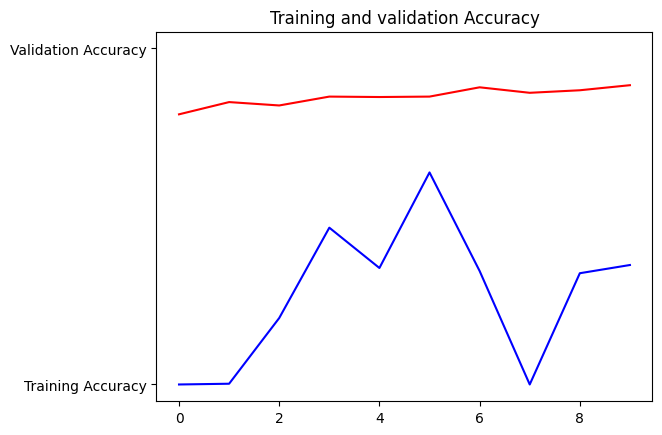

<Figure size 640x480 with 0 Axes>

In [ ]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=my_model.my_model['acc']
val_acc=my_model.my_model['val_acc']
loss=my_model.my_model['loss']
val_loss=my_model.my_model['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation Accuracy')
plt.figure()


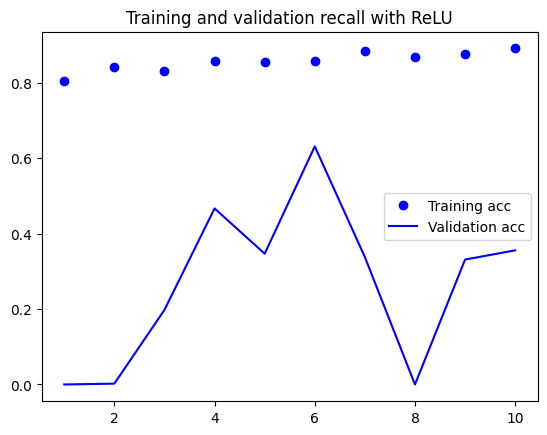

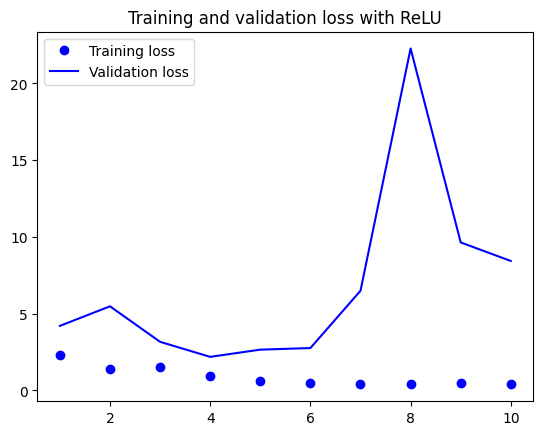

In [ ]:
#plot loss and accuracy for detection overfitting (50 epochs)
import matplotlib.pyplot as plt
recall = my_model.my_model['recall']
val_recall = my_model.my_model['val_recall']
loss = my_model.my_model['loss']
val_loss = my_model.my_model['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, recall, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation recall with ReLU')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss with ReLU')
plt.legend()

plt.show()

In [50]:
!python model_main_tf2.py --model_dir=/content/drive/MyDrive/trainingdemo/models/my_centernet_resnet101_v1_fpn --pipeline_config_path=/content/drive/MyDrive/trainingdemo/models/my_centernet_resnet101_v1_fpn/pipeline.config

In [53]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path / --trained_checkpoint_dir /content/drive/MyDrive/trainingdemo/models/my_centernet_resnet101_v1_fpn --output_directory /content/drive/MyDrive/trainingdemo/exported_models/my_model1

<Figure size 640x480 with 0 Axes>

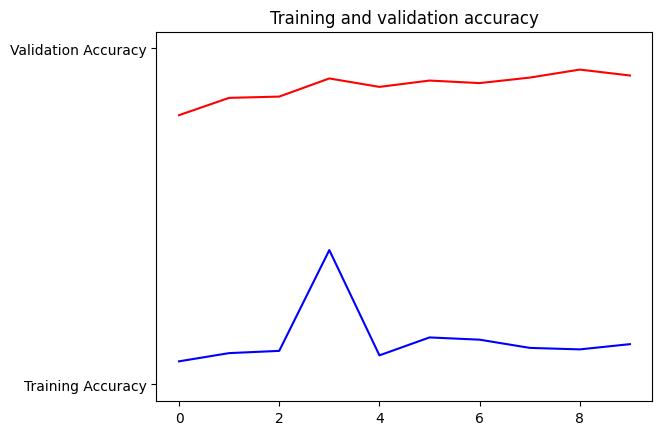

<Figure size 640x480 with 0 Axes>

In [ ]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
acc=my_model1.my_model1['acc']
val_acc=my_model1.my_model1['val_acc']
loss=my_model1.my_model1['loss']
val_loss=my_model1.my_model1['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

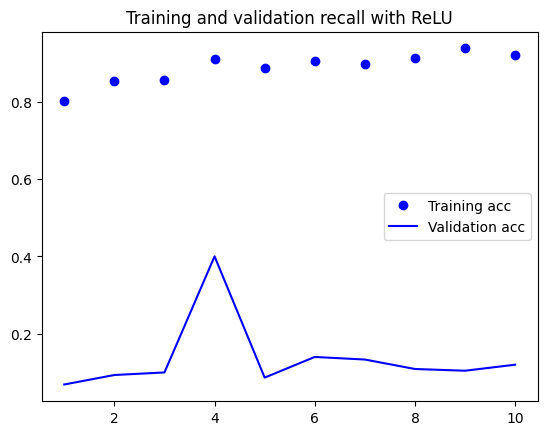

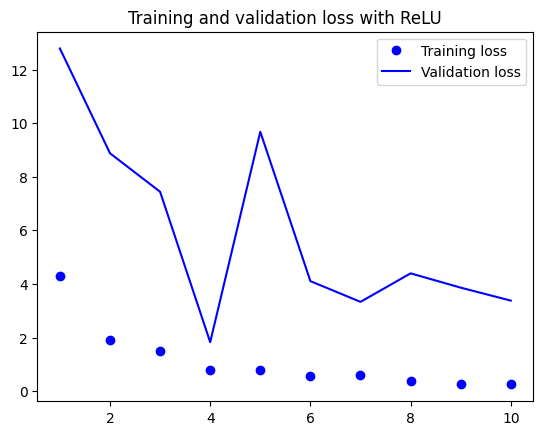

In [ ]:
#plot loss and accuracy for detection overfitting (50 epochs)
import matplotlib.pyplot as plt
recall = my_model1.my_model1['recall']
val_recall = my_model1.my_model1['val_recall']
loss = my_model1.my_model1['loss']
val_loss = my_model1.my_model1['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation recall with ReLU')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss with ReLU')
plt.legend()

plt.show()

In [51]:
!python model_main_tf2.py --model_dir=/content/drive/MyDrive/trainingdemo/models/my_efficientdet_d2_coco17_tpu --pipeline_config_path=/content/drive/MyDrive/trainingdemo/models/my_efficientdet_d2_coco17_tpu/pipeline.config

In [54]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/drive/MyDrive/trainingdemo/models/my_efficientdet_d2_coco17_tpu/pipeline.config --trained_checkpoint_dir /content/drive/MyDrive/trainingdemo/models/my_efficientdet_d2_coco17_tpu --output_directory /content/drive/MyDrive/trainingdemo/exported_models/my_model2

In [55]:
ls

annotations/         export_tflite_graph_tf2.py  model_main_tf2.py
exported_models/     generate_tfrecord.py        models/
exporter_main_v2.py  images/                     pre-trained-models/


In [49]:
!tensorboard --logdir= /content/drive/MyDrive/trainingdemo/exported_models/my_model

usage: tensorboard
       [-h]
       [--helpfull]
       [--logdir PATH]
       [--logdir_spec PATH_SPEC]
       [--host ADDR]
       [--bind_all]
       [--port PORT]
       [--reuse_port BOOL]
       [--load_fast {false,auto,true}]
       [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
       [--grpc_creds_type {local,ssl,ssl_dev}]
       [--grpc_data_provider PORT]
       [--purge_orphaned_data BOOL]
       [--db URI]
       [--db_import]
       [--inspect]
       [--version_tb]
       [--tag TAG]
       [--event_file PATH]
       [--path_prefix PATH]
       [--window_title TEXT]
       [--max_reload_threads COUNT]
       [--reload_interval SECONDS]
       [--reload_task TYPE]
       [--reload_multifile BOOL]
       [--reload_multifile_inactive_secs SECONDS]
       [--generic_data TYPE]
       [--samples_per_plugin SAMPLES_PER_PLUGIN]
       [--detect_file_replacement BOOL]
       {serve,dev}
       ...
tensorboard: error: argument {serve,dev}: invalid choice: '/content/drive/M

### Inference

In [56]:
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
from PIL import ImageOps
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

In [58]:

# inception resnet version 2
#module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"

module_handle = "https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1"

In [71]:
# inception resnet version 2
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"

In [72]:
model = hub.load(module_handle)

In [73]:
# take a look at the available signatures for this particular model
model.signatures.keys()

KeysView(_SignatureMap({'default': <ConcreteFunction pruned(images) at 0x7BFE1D2F01F0>}))

In [74]:
detector = model.signatures['default']

In [75]:
def resize_image(url, new_width=256, new_height=256):



    # create a temporary file ending with ".jpg"
    _, filename = tempfile.mkstemp(suffix=".jpg")

    # opens the image
    pil_image = Image.open(url)

    # resizes the image. will crop if aspect ratio is different.
    pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)

    # converts to the RGB colorspace
    pil_image_rgb = pil_image.convert("RGB")

    # saves the image to the temporary file created earlier
    pil_image_rgb.save(filename, format="JPEG", quality=90)

    print("Image downloaded to %s." % filename)

    return filename

In [76]:
# You can choose a different URL that points to an image of your choice
url = "/content/drive/MyDrive/trainingdemo/images/test/7571.jpg"

# download the image and use the original height and width
downloaded_image_path = resize_image(url, 3872, 2592)

<ipython-input-75-9504006f3fb2>:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)


Image downloaded to /tmp/tmpx07wxlcu.jpg.


In [79]:
url = "/content/drive/MyDrive/Dataset/Test/image/10163.jpg"
downloaded_image_path = resize_image(url, 3872, 2592)

<ipython-input-75-9504006f3fb2>:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)


Image downloaded to /tmp/tmpq170wy7v.jpg.


In [80]:
def load_img(path):
    '''
    Loads a JPEG image and converts it to a tensor.

    Args:
        path (string) -- path to a locally saved JPEG image

    Returns:
        (tensor) -- an image tensor
    '''

    # read the file
    img = tf.io.read_file(path)

    # convert to a tensor
    img = tf.image.decode_jpeg(img, channels=3)

    return img


def run_detector(detector, path):
    '''
    Runs inference on a local file using an object detection model.

    Args:
        detector (model) -- an object detection model loaded from TF Hub
        path (string) -- path to an image saved locally
    '''

    # load an image tensor from a local file path
    img = load_img(path)

    # add a batch dimension in front of the tensor
    converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]

    # run inference using the model
    result = detector(converted_img)

    # save the results in a dictionary
    result = {key:value.numpy() for key,value in result.items()}

    # print results
    print("Found %d objects." % len(result["detection_scores"]))

    print(result["detection_scores"])
    print(result["detection_class_entities"])
    print(result["detection_boxes"])


In [67]:
# runs the object detection model and prints information about the objects found including bounding box coordinates
run_detector(detector, downloaded_image_path)

Found 100 objects.
[0.23066814 0.21418738 0.19670063 0.19663052 0.18161766 0.17763022
 0.17744671 0.17611262 0.17484978 0.17387506 0.17268792 0.17197569
 0.17140725 0.16557032 0.16331896 0.16238631 0.16214195 0.16149113
 0.161342   0.15880087 0.15799895 0.15792888 0.15783082 0.15692519
 0.15513524 0.1547585  0.15463883 0.15262172 0.15189408 0.15163673
 0.15053627 0.14905179 0.14901985 0.14894873 0.14887773 0.14572102
 0.14555208 0.14518748 0.1445281  0.14398918 0.14329466 0.14328945
 0.14204717 0.14161085 0.1415844  0.14070614 0.13926132 0.13838124
 0.13806379 0.137929   0.1375237  0.13694854 0.13664554 0.13633169
 0.13521741 0.1345403  0.1336322  0.13329667 0.13281645 0.13236946
 0.13193227 0.13160996 0.13157387 0.13116278 0.13065112 0.1305512
 0.13033438 0.12974757 0.12972695 0.12896807 0.12870485 0.12744474
 0.12647074 0.12621441 0.12613307 0.12597181 0.12537926 0.12523876
 0.12436555 0.1239536  0.12389217 0.12294246 0.12269181 0.1226289
 0.12225033 0.12212133 0.12206157 0.1214149  

In [70]:
# runs the object detection model and prints information about the objects found including bounding box coordinates
run_detector(detector, downloaded_image_path)

Found 100 objects.
[0.1809461  0.17218854 0.15828569 0.15477197 0.15013395 0.1344614
 0.13197076 0.12735018 0.12687129 0.11958814 0.11184101 0.11040608
 0.10912897 0.10904343 0.10651553 0.10388296 0.10288316 0.10203226
 0.10129499 0.10106482 0.10093503 0.09864325 0.0983852  0.09736799
 0.09597996 0.0959717  0.09541479 0.09500036 0.09381153 0.092752
 0.09253399 0.09227614 0.09194866 0.09109003 0.09078078 0.089874
 0.08907946 0.08853423 0.08847549 0.08815428 0.08715656 0.08680448
 0.08562697 0.08407295 0.08251468 0.08226014 0.08149455 0.08083708
 0.0805895  0.08016516 0.07985295 0.07958308 0.07788187 0.07769707
 0.07769021 0.07750674 0.07705865 0.07696007 0.07678359 0.07671998
 0.07642563 0.07627399 0.07616887 0.07551374 0.07511645 0.07505009
 0.07474033 0.07439692 0.07431163 0.07415067 0.07412903 0.07400294
 0.07379371 0.07358818 0.07351221 0.07336044 0.07294858 0.07286818
 0.07276864 0.07201808 0.07198019 0.07197409 0.07094513 0.07093574
 0.0709353  0.07060744 0.07048081 0.07047389 0.0

In [78]:
 #runs the object detection model and prints information about the objects found including bounding box coordinates
run_detector(detector, downloaded_image_path)

Found 100 objects.
[0.75484294 0.61498374 0.6131087  0.6068113  0.6035387  0.5989875
 0.548051   0.5435017  0.53035027 0.502234   0.46292135 0.42777732
 0.4243734  0.40264553 0.40169674 0.38939112 0.3843442  0.37033474
 0.36097634 0.35395142 0.28411224 0.2827812  0.26520246 0.2370001
 0.23083547 0.22761439 0.20523761 0.20516014 0.19022259 0.18697271
 0.17543688 0.16338114 0.16294691 0.16047236 0.15966767 0.15726928
 0.15414236 0.14728549 0.14569257 0.1441855  0.13940525 0.13620289
 0.13538492 0.13277051 0.11762969 0.11411832 0.11269772 0.11228207
 0.11039498 0.11015704 0.10969423 0.10914994 0.10865141 0.10647018
 0.10268443 0.10256545 0.09875395 0.09818494 0.09369273 0.09120606
 0.08946239 0.08942379 0.08926687 0.08888301 0.08571751 0.0830709
 0.08111332 0.07342865 0.07225551 0.06600618 0.06344203 0.06315782
 0.06274489 0.06271849 0.06211608 0.06192903 0.06045849 0.05967527
 0.05951426 0.05797831 0.05188547 0.05177978 0.05172253 0.05163997
 0.05147329 0.05080247 0.04775679 0.04709359 0

In [81]:
# runs the object detection model and prints information about the objects found including bounding box coordinates
run_detector(detector, downloaded_image_path)

Found 100 objects.
[0.15043463 0.11684171 0.10743666 0.08226329 0.07378908 0.05889396
 0.05735018 0.04549035 0.04057087 0.03573964 0.03218608 0.02357169
 0.02326269 0.02139963 0.01679305 0.01553533 0.01542147 0.01519134
 0.01455893 0.01323805 0.01206051 0.011041   0.01057353 0.0090599
 0.00904647 0.0087871  0.00875472 0.00865119 0.00836349 0.0081063
 0.0079497  0.00777956 0.00768172 0.0067817  0.00599756 0.00585945
 0.00578594 0.00547479 0.00541992 0.00539641 0.00503909 0.00490522
 0.00437986 0.0041522  0.00398466 0.00394844 0.00389213 0.00372399
 0.00370133 0.00358553 0.0035444  0.00351494 0.00347077 0.00338539
 0.00335987 0.00324839 0.00317464 0.00305613 0.00303562 0.00281671
 0.0027777  0.00275887 0.00271627 0.00269505 0.00264176 0.00259927
 0.00257185 0.002527   0.0024115  0.00237784 0.00237661 0.00234407
 0.00233892 0.00229499 0.00228874 0.00225653 0.00215016 0.00209278
 0.00208704 0.0020642  0.00206175 0.00205643 0.0020394  0.00200013
 0.00198064 0.00196903 0.00194965 0.00191278 

## Imports and data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install segmentation-models-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.3 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=f05a73ba2811842595366aaa1a167a00fd789ae6f5d7178838e0cb296d41b1dd
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60944 sha256=cec4adb78265ccd0bcb0b63da7d15f4dc838f08ce3620570b2c3e64cea8e34a1
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c6

In [ ]:
################# IMPORT PACKAGES #############
%load_ext tensorboard
import os
import sys
import cv2
import random
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from google.colab.patches import cv2_imshow
import sklearn
from sklearn import model_selection
from sklearn import metrics

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader
import torch.nn as nn
from collections import defaultdict
import torchvision
from torchvision import transforms
import torch.nn.functional as F
from tqdm.auto import tqdm
from torch.utils.tensorboard import SummaryWriter
import copy
import time

import segmentation_models_pytorch

import albumentations as A
from albumentations.pytorch import ToTensorV2
from albumentations.pytorch.transforms import ToTensor

We will be working on Labelled for the baseline. <br>
Labelled has Flooded, Non-Flooded both having image and mask

In [ ]:
!ls

drive  sample_data


In [ ]:
%%capture
!unzip -n /content/drive/MyDrive/512_Images/512_Images.zip

In [ ]:
os.makedirs("/content/512_Images/Train/Labeled/Flooded/image", exist_ok=True)
os.makedirs("/content/512_Images/Train/Labeled/Non-Flooded/image", exist_ok=True)
os.makedirs("/content/512_Images/Train/Labeled/Flooded/mask", exist_ok=True)
os.makedirs("/content/512_Images/Train/Labeled/Non-Flooded/mask", exist_ok=True)
os.makedirs("/content/512_Images/Train/Unlabeled/image", exist_ok=True)
os.makedirs("/content/512_Images/Test/image", exist_ok=True)

In [ ]:
!ls /content/drive/MyDrive/Dataset/Train/Labeled

Flooded  Non-Flooded


In [ ]:
!ls /content/512_Images/Train/Labeled/Flooded

image  mask


In [ ]:
RESIZE=(512,512)
temp_root = "/content/drive/MyDrive/Dataset"
local_root = "/content/512_Images"
def resize_and_save(path, resize=RESIZE, samples='all'):
  if len(os.listdir(os.path.join(local_root, path))) == 0:
    print(f"{path} --> Saving...\n")
    if samples == 'all':
      samples = len(os.listdir(os.path.join(temp_root, path)))
    for img_name in tqdm(os.listdir(os.path.join(temp_root, path))[:samples]):
      img = cv2.imread(os.path.join(temp_root, path, img_name))
      img = cv2.resize(img, RESIZE)
      cv2.imwrite(os.path.join(local_root, path, img_name), img)
  else:
    print(f"{path} --> images are already saved")

In [ ]:
!ls

512_Images  drive  sample_data


In [ ]:
resize_and_save("Train/Labeled/Flooded/image")
resize_and_save("Train/Labeled/Non-Flooded/image")
resize_and_save("Train/Labeled/Flooded/mask")
resize_and_save("Train/Labeled/Non-Flooded/mask")
resize_and_save("Train/Unlabeled/image")
resize_and_save("Test/image")
resize_and_save("Train/Unlabeled/image", samples=100)

Train/Labeled/Flooded/image --> Saving...



  0%|          | 0/51 [00:00<?, ?it/s]

Train/Labeled/Non-Flooded/image --> Saving...



  0%|          | 0/347 [00:00<?, ?it/s]

Train/Labeled/Flooded/mask --> Saving...



  0%|          | 0/51 [00:00<?, ?it/s]

Train/Labeled/Non-Flooded/mask --> Saving...



  0%|          | 0/347 [00:00<?, ?it/s]

Train/Unlabeled/image --> Saving...



  0%|          | 0/1047 [00:00<?, ?it/s]

Test/image --> Saving...



  0%|          | 0/448 [00:00<?, ?it/s]

Train/Unlabeled/image --> images are already saved


In [ ]:
flood_dir = "Train/Labeled/Flooded"
non_flood_dir = "Train/Labeled/Non-Flooded"

f_img_dir = os.path.join(local_root, flood_dir, "image")
f_mask_dir = os.path.join(local_root, flood_dir, "mask")
n_img_dir = os.path.join(local_root, non_flood_dir, "image")
n_mask_dir = os.path.join(local_root, non_flood_dir, "mask")

f_img = len(os.listdir(f_img_dir))
f_mask = len(os.listdir(f_mask_dir))
n_img = len(os.listdir(n_img_dir))
n_mask = len(os.listdir(n_mask_dir))
print(f"Flooded images:      {f_img} Flooded masks:     {f_mask}")
print(f"Non-Flooded images: {n_img} Non-Flooded masks: {n_mask}")

Flooded images:      51 Flooded masks:     51
Non-Flooded images: 347 Non-Flooded masks: 347


We have a imbalance with Flooded and Non-Flooded images

5 5 2 9
141.66666666666666 141.66666666666666 56.666666666666664 255.0


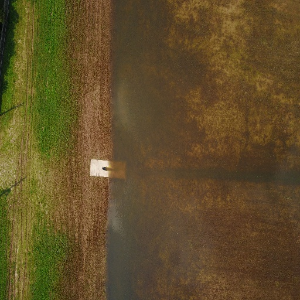

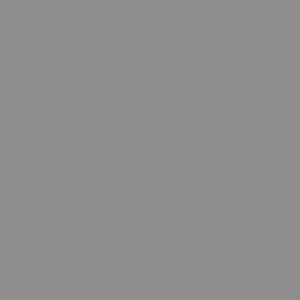

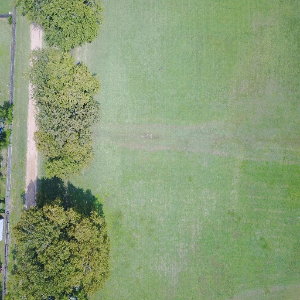

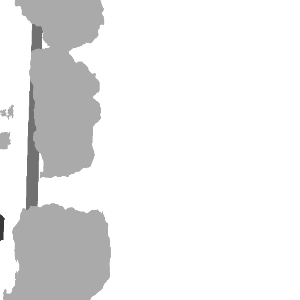

In [ ]:
sample_f_img = cv2.imread(os.path.join(f_img_dir, sorted(os.listdir(f_img_dir))[0]))
sample_f_mask = cv2.imread(os.path.join(f_mask_dir, sorted(os.listdir(f_mask_dir))[0]))
sample_n_img = cv2.imread(os.path.join(n_img_dir, sorted(os.listdir(n_img_dir))[0]))
sample_n_mask = cv2.imread(os.path.join(n_mask_dir, sorted(os.listdir(n_mask_dir))[0]))

print(np.min(sample_f_mask),
np.max(sample_f_mask),
np.min(sample_n_mask),
np.max(sample_n_mask))

sample_f_mask = sample_f_mask * (255/9)
sample_n_mask = sample_n_mask * (255/9)

print(np.min(sample_f_mask),
np.max(sample_f_mask),
np.min(sample_n_mask),
np.max(sample_n_mask))

cv2_imshow(cv2.resize(sample_f_img, dsize=(300, 300)))
cv2_imshow(cv2.resize(sample_f_mask, dsize=(300, 300)))
cv2_imshow(cv2.resize(sample_n_img, dsize=(300, 300)))
cv2_imshow(cv2.resize(sample_n_mask, dsize=(300, 300)))

Why are the masks black? <br>
Because the values are mapped 0 --> 9 for 10 classes


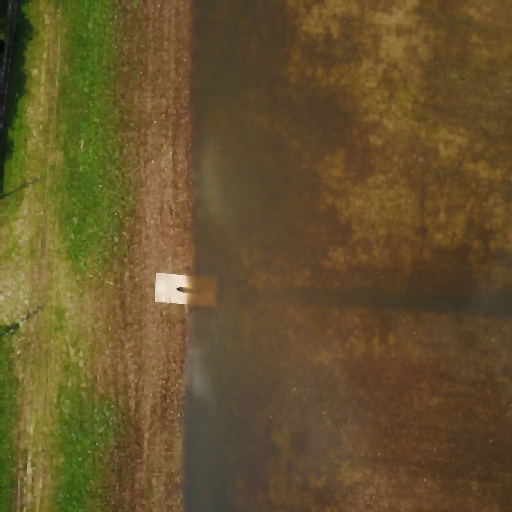

In [ ]:
kernel = np.ones((2,2),np.uint8)
cv2_imshow(cv2.erode(cv2.dilate(cv2.bilateralFilter(sample_f_img, 5, 75, 75), kernel, iterations=2), kernel, iterations=1))

##Configuration

In [ ]:
CLASSES={'Background':0,'Building-flooded':1,'Building-non-flooded':2,'Road-flooded':3,'Road-non-flooded':4,
         'Water':5,'Tree':6,'Vehicle':7,'Pool':8,'Grass':9}
IMG_DIM= 512

In [ ]:
# CONFIG
TENSORBOARD_DIR = "/content/drive/MyDrive/runs/"
MODEL_DIR = "/content/drive/MyDrive/models/"
UNLABELLED_SPLIT = 100 # first 100 unlabelled examples will be used
## RAM storage error
os.makedirs(TENSORBOARD_DIR, exist_ok=True)
os.makedirs(MODEL_DIR, exist_ok=True)

#### UNET CONFIG #########
# ENCODER_DEPTH=5
# DECODER_CHANNELS=(256, 128, 64, 32, 16)
# # BATCH_SIZE= [8, 16, 32, 64, 128]
# # LR = [1, 1e-2, 1e-4, 1e-6]
# BATCH_SIZE = [8]
# LR = [1e-2]
# EPOCHS= 50
# ENCODER_NAME= 'resnet34'

# ####### DEEPLAB V3+ CONFIG #######
ENCODER_DEPTH=5
DECODER_CHANNELS=256
BATCH_SIZE= [8]
EPOCHS= 100
LR = [1e-3]
ENCODER_NAME= 'efficientnet-b3'

##Dataloader

In [ ]:
dirs = """
flood_dir
non_flood_dir

f_img_dir
f_mask_dir
n_img_dir
n_mask_dir
"""
x_f = [os.path.join(f_img_dir, file) for file in sorted(os.listdir(f_img_dir))]
x_n = [os.path.join(n_img_dir, file) for file in sorted(os.listdir(n_img_dir))]

x = x_f + x_n

x_train, x_test = model_selection.train_test_split(x, test_size=0.3, shuffle=True)

train_transform1 = A.Compose([
        A.Resize(IMG_DIM, IMG_DIM),
        A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=30, p=0.5),
        # A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25, p=0.5),
        A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.5),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
    ])

train_transform2=A.Compose([ToTensorV2()])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
class SegDataset:
    def __init__(self, x_paths, trans1,trans2, img_dim, unlabelled=False):
        self.x_paths = x_paths
        self.unlabelled = unlabelled
        if not self.unlabelled:
          self.y_paths = [x.replace("image", "mask").replace(".jpg", "_lab.png") for x in self.x_paths]
        else:
          self.y_paths = None
        self.img_dim = img_dim
        self.trans1=trans1
        self.trans2=trans2

    def __len__(self):
      return len(self.x_paths)

    def get_newMask(self, mask, classes, dim=IMG_DIM):
      mask = torch.as_tensor(mask[:,:,0], dtype=torch.int64)
      return torch.moveaxis(torch.nn.functional.one_hot(mask, num_classes=len(classes)), -1, 0)

    def __getitem__(self, index):
      image = cv2.imread(self.x_paths[index])

      kernel = np.ones((2,2),np.uint8)
      image = cv2.bilateralFilter(image, 5, 75, 75)
      image = cv2.erode(cv2.dilate(image, kernel, iterations=2), kernel, iterations=1)
      if not self.unlabelled:
        mask = cv2.imread(self.y_paths[index])
      else:
        mask = np.random.rand(512, 512, 3)
      if self.trans1:
        transformed1 = self.trans1(image=image, mask=mask)
        image = transformed1["image"]
        mask = self.get_newMask(transformed1["mask"],CLASSES)
      if self.trans2:
        transformed2 = self.trans2(image=image, mask=mask)
        image = transformed2["image"]
      return image, mask

In [ ]:
%cd /content/drive/MyDrive/Dataset
!ls

/content/drive/MyDrive/Dataset
Test  Train  Validation


##Train setup

###Functions

In [ ]:
def dice_loss(pred, target, smooth = 1e-5):
    pred = pred.contiguous()
    target = target.contiguous()

    intersection = (pred * target).sum(dim=2).sum(dim=2)

    loss = (1 - ((2. * intersection + smooth) / (pred.sum(dim=2).sum(dim=2) + target.sum(dim=2).sum(dim=2) + smooth)))

    return loss.mean()

In [ ]:
def calc_loss(pred, target, metrics, bce_weight=0.5, unlabelled=False):
    bce = F.binary_cross_entropy_with_logits(pred, target.to(torch.float32))
    pred = F.sigmoid(pred)
    dice = dice_loss(pred, target)

    target_np=target.data.cpu().numpy()
    pred_np=pred.data.cpu().numpy()
    MIoU= np.mean(sklearn.metrics.jaccard_score(np.argmax(target_np,axis=1).flatten(), np.argmax(pred_np,axis=1).flatten(), average=None))
    loss = bce * bce_weight + dice * (1 - bce_weight)
    if not unlabelled:
      metrics['bce'] += bce.data.cpu().numpy() * target.size(0)
      metrics['dice'] += dice.data.cpu().numpy() * target.size(0)
      metrics['loss'] += loss.data.cpu().numpy() * target.size(0)
      metrics['MIoU'] += MIoU * target.size(0)

    return loss

In [ ]:
def print_metrics(metrics, epoch_samples, phase):
    outputs = []
    for k in metrics.keys():
        outputs.append("{}: {:4f}".format(k, metrics[k] / epoch_samples))
    print("{}: {}".format(phase, ", ".join(outputs)))

### Train function

In [ ]:
training_set = SegDataset(x_train,  train_transform1, train_transform2, img_dim=IMG_DIM)
testing_set = SegDataset(x_test, train_transform1,train_transform2, img_dim=IMG_DIM)
image_datasets = {'train': training_set, 'valid': testing_set}

In [ ]:
u_dir = "/content/512_Images/Train/Unlabeled/image"
unlabelled_paths = [os.path.join(u_dir, file) for file in os.listdir(u_dir)]
unlabelled_set = SegDataset(unlabelled_paths[0:-500], trans1=train_transform1,trans2=train_transform2, img_dim=IMG_DIM, unlabelled=True)
image_datasets["unlabelled"] = unlabelled_set

In [ ]:
def train_model(unique_name, num_epochs=EPOCHS, start_alpha_from=15, reach_max_alpha_in=655, max_alpha=0.5):
  for lr in LR:
    for bs in BATCH_SIZE:
      # if(lr == 1 and (bs == 8 or bs == 16)):
      #   continue
      print("__"*80)
      print("__"*80)
      print(f"name: {unique_name} LR: {lr} BS: {bs}")
      print("__"*80)
      print("__"*80)

      alphas = np.linspace(0, max_alpha, reach_max_alpha_in-start_alpha_from)

      os.makedirs(os.path.join(TENSORBOARD_DIR, f'{unique_name}-{lr}-{bs}'), exist_ok=True)
      writer = SummaryWriter(log_dir=os.path.join(TENSORBOARD_DIR, f'{unique_name}-{lr}-{bs}'))

      best_loss = 1e10
      best_epoch = 0
      best_miou = 0

      train_data_loader = torch.utils.data.DataLoader(training_set, batch_size=bs, num_workers=0)
      test_data_loader = torch.utils.data.DataLoader(testing_set, batch_size=bs, num_workers=0)
      ulbl_data_loader = torch.utils.data.DataLoader(unlabelled_set, batch_size=bs, num_workers=0)
      dataloaders = {'train': train_data_loader,'valid': test_data_loader, "unlabelled" : ulbl_data_loader}

      # model = segmentation_models_pytorch.Unet(encoder_name=ENCODER_NAME, encoder_depth=ENCODER_DEPTH,
      #                                     decoder_channels=DECODER_CHANNELS, classes=len(CLASSES))
      model = segmentation_models_pytorch.DeepLabV3Plus(encoder_name=ENCODER_NAME, encoder_depth=ENCODER_DEPTH,
                                          decoder_channels=DECODER_CHANNELS, classes=len(CLASSES))
      model = model.to(device)
      model.load_state_dict(torch.load(os.path.join(MODEL_DIR, "abhi_sudo_full-pretrained_preproc_1-deeplabv3+-ep_7-0.001-8.pt")))
      best_model_wts = copy.deepcopy(model.state_dict())

      # optimizer = optim.Adam(model.parameters(), lr=lr) ## IF YOU CHANGE THIS, CHANGE THE UNIQUE ABOVE
      optimizer = optim.SGD(model.parameters(), lr=0.01)
      # scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=[7, 20, 80], gamma=0.1)
      scheduler = None

      for epoch in range(num_epochs):
          print('__' * 80)
          print('Epoch {}/{}'.format(epoch, num_epochs - 1))
          print('__' * 80)

          if epoch < start_alpha_from:
            alpha = 0
          elif epoch-start_alpha_from >= len(alphas):
            alpha = alphas[-1]
          else:
            alpha = alphas[max(0,epoch-start_alpha_from)]

          since = time.time()

          for phase in ['train', 'unlabelled', 'valid']:
              print(phase)
              print("__"*20)
              if alpha == 0 and phase == 'unlabelled':
                continue
              if phase in ['train', 'unlabelled']:
                model.train()
              else:
                model.eval()

              metrics = defaultdict(float)
              epoch_samples = 0

              for batch_no, (inputs, labels) in enumerate(tqdm(dataloaders[phase])):
                  inputs = inputs.to(device)
                  if phase in ['train', 'valid']:
                    labels = labels.to(device)

                  # zero the parameter gradients
                  optimizer.zero_grad()

                  # forward
                  with torch.set_grad_enabled(phase in ['train', 'unlabelled']):
                      outputs = model(inputs)
                      # loss = calc_loss(outputs, labels, metrics)

                      if phase in ["train", "valid"]:
                        loss = calc_loss(outputs, labels, metrics)
                      else:
                        loss = alpha * calc_loss(outputs, pseudo_labels[batch_no].to(device), metrics, unlabelled=True)
                      # backward + optimize only if in training phase
                      if phase in ['train', 'unlabelled']:
                          loss.backward()
                          optimizer.step()

                  # statistics
                  epoch_samples += inputs.size(0)

              if scheduler is not None and phase == "train":
                scheduler.step()

              print_metrics(metrics, epoch_samples, phase)
              epoch_loss = metrics['loss'] / epoch_samples
              epoch_miou = metrics['MIoU'] / epoch_samples

              ## tensorboard writer
              if phase == "train":
                writer.add_scalar(f'Loss/{phase}', epoch_loss, epoch)
                writer.add_scalar(f'MIoU/{phase}', epoch_miou, epoch)
                writer.add_scalar(f'Alpha/{phase}', alpha, epoch)
                # writer.add_scalars(f'Loss/{phase}', {'loss':epoch_loss, 'alpha':alpha}, epoch)
                # writer.add_scalars(f'MIoU/{phase}', {'miou':epoch_miou, 'alpha':alpha}, epoch)

              if phase == "valid": # older implementation had phase == 'val'
                writer.add_scalar(f'Loss/val', epoch_loss, epoch)
                writer.add_scalar(f'MIoU/val', epoch_miou, epoch)
                writer.add_scalar(f'Alpha/val', alpha, epoch)
                # writer.add_scalars(f'Loss/val', {'loss':epoch_loss, 'alpha':alpha}, epoch)
                # writer.add_scalars(f'MIoU/val', {'miou':epoch_miou, 'alpha':alpha}, epoch)

              ## generate pseudo labels
              if phase == 'train' and epoch >= start_alpha_from-1:
                pseudo_labels = []
                model.eval()
                for inputs, _ in tqdm(dataloaders['unlabelled'], desc="Predicting pseudo labels"):
                  inputs = inputs.to(device)
                  with torch.no_grad():
                    outputs = model(inputs)
                    pseudo_labels.append(outputs.detach().cpu())

              # deep copy the model
              if phase == 'valid' and epoch_miou > best_miou:
                  best_miou = epoch_miou
                  best_epoch = epoch
                  best_model_wts = copy.deepcopy(model.state_dict())
                  print(f'Best miou: {best_miou:.4f} Epoch: {epoch}')

              if epoch % 5 == 0:
                  PATH = os.path.join(MODEL_DIR, f'{unique_name}-ep_{best_epoch}-{lr}-{bs}.pt')
                  torch.save(best_model_wts, PATH)
                  PATH = os.path.join(MODEL_DIR, f'{unique_name}-ep_{epoch}-{lr}-{bs}.pt')
                  torch.save(model.state_dict(), PATH)

          time_elapsed = time.time() - since
          print('{:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

      print('Best val loss: {:4f}'.format(best_loss))
      writer.close()
      # load best model weights
      # model.load_state_dict(best_model_wts)
      PATH = os.path.join(MODEL_DIR, f'{unique_name}-ep_{best_epoch}-{lr}-{bs}.pt')
      torch.save(best_model_wts, PATH)

  return model

##Training

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
os.chdir("/content/")

cuda:0


In [ ]:
!ls /content/drive/MyDrive/runs

In [ ]:
!ls /content/drive/MyDrive/models/abhi_sudo_full*

ls: cannot access '/content/drive/MyDrive/models/abhi_sudo_full*': No such file or directory


In [ ]:
# %rm -r /content/drive/MyDrive/runs/abhi_sudo-pretrained_preproc_1-deeplabv3+-0.001-8/

In [ ]:
torch.cuda.empty_cache()

In [ ]:
unique_name = "abhi_sudo_full_2-pretrained_preproc_1-deeplabv3+"

In [ ]:
# check the unique name to avoid over-writing
# print( # error on purpose


In [ ]:
model = train_model(unique_name, num_epochs=EPOCHS)

________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________
name: abhi_sudo_full_2-pretrained_preproc_1-deeplabv3+ LR: 0.001 BS: 8
________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b3-5fb5a3c3.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b3-5fb5a3c3.pth
100%|██████████| 47.1M/47.1M [00:02<00:00, 18.4MB/s]


FileNotFoundError: ignored

In [ ]:
%ls /content/drive/MyDrive/models/

In [ ]:
print(

In [ ]:
model

#Saving Masks

##Config

In [ ]:
MODEL_LOAD_PATH = f'/content/drive/MyDrive/models/abhi_sudo_full_2-pretrained_preproc_1-deeplabv3+-ep_20-0.001-8.pt'
DIR_PATH = f'/content/drive/MyDrive/FloodNet Challenge @ EARTHVISION 2021 - Track 1/Test/image'
SAVE_PATH = f'/content/predictions'

os.makedirs(SAVE_PATH, exist_ok=True)

LOAD_SIZE = 8 # pred generating load size

##Code

In [ ]:

# ENCODER_DEPTH=5
# DECODER_CHANNELS=256
# ENCODER_NAME= 'resnet34'
# IMG_DIM = 512

# model = segmentation_models_pytorch.DeepLabV3Plus(encoder_name=ENCODER_NAME, encoder_depth=ENCODER_DEPTH,
#                                           decoder_channels=DECODER_CHANNELS, classes=10)
# model = model.to("cuda")

In [ ]:
# model = segmentation_models_pytorch.Unet(encoder_name=ENCODER_NAME, encoder_depth=ENCODER_DEPTH,
#                                           decoder_channels=DECODER_CHANNELS, classes=len(CLASSES))

model = segmentation_models_pytorch.DeepLabV3Plus(encoder_name=ENCODER_NAME, encoder_depth=ENCODER_DEPTH,
                                          decoder_channels=DECODER_CHANNELS, classes=len(CLASSES))
model = model.to(device)
model.load_state_dict(torch.load(MODEL_LOAD_PATH))
# model.eval()

<All keys matched successfully>

In [ ]:
all_images=sorted(os.listdir(DIR_PATH))
all_masks=[x.replace(".jpg", ".png") for x in all_images]

image_paths=[os.path.join(DIR_PATH, file) for file in sorted(os.listdir(DIR_PATH))]
mask_paths=[os.path.join(SAVE_PATH, file) for file in all_masks]
print(len(image_paths))
print(mask_paths)

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

448
['/content/predictions/10163.png', '/content/predictions/10164.png', '/content/predictions/10167.png', '/content/predictions/10174.png', '/content/predictions/10183.png', '/content/predictions/10808.png', '/content/predictions/10812.png', '/content/predictions/10813.png', '/content/predictions/10814.png', '/content/predictions/10823.png', '/content/predictions/10829.png', '/content/predictions/10838.png', '/content/predictions/10839.png', '/content/predictions/10843.png', '/content/predictions/11483.png', '/content/predictions/6336.png', '/content/predictions/6342.png', '/content/predictions/6353.png', '/content/predictions/6362.png', '/content/predictions/6371.png', '/content/predictions/6377.png', '/content/predictions/6383.png', '/content/predictions/6389.png', '/content/predictions/6391.png', '/content/predictions/6394.png', '/content/predictions/6405.png', '/content/predictions/6412.png', '/content/predictions/6417.png', '/content/predictions/6419.png', '/content/predictions/6

In [ ]:
 def reverse_transform_mask(inp):
    inp=inp.transpose((1, 2, 0))
    t_mask=np.argmax(inp,axis=2).astype('float32')
    t_mask=cv2.resize(t_mask, dsize=(4000, 3000))
    kernel = np.ones((3,3),np.uint8)
    t_mask = cv2.erode(t_mask, kernel, iterations=1)
    return t_mask

In [ ]:
class ValDataset:
    def __init__(self, img_paths, val_trans, img_dim):
        self.img_paths = img_paths
        self.img_dim = img_dim
        self.val_trans=val_trans

    def __len__(self):
      return len(self.img_paths)

    def __getitem__(self, index):
      image = cv2.resize(cv2.imread(self.img_paths[index]), dsize=(self.img_dim, self.img_dim))

      kernel = np.ones((2,2),np.uint8)
      image = cv2.bilateralFilter(image, 5, 75, 75)
      image = cv2.erode(cv2.dilate(image, kernel, iterations=2), kernel, iterations=1)

      if self.val_trans:
        image=self.val_trans(image)
      return image, index

In [ ]:
val_set = ValDataset(image_paths, val_transform , img_dim=IMG_DIM)
val_dataloader = torch.utils.data.DataLoader(val_set, batch_size=LOAD_SIZE, shuffle=False)

In [ ]:
torch.cuda.empty_cache()

In [ ]:
model.eval()

for inputs, index in tqdm(val_dataloader):
  inputs = inputs.to("cuda")
  with torch.no_grad():
    preds = model(inputs)
    preds = F.sigmoid(preds)
    preds = preds.data.cpu().numpy()
  for i in range(LOAD_SIZE):
    f_mask=reverse_transform_mask(preds[i])
    cv2.imwrite(mask_paths[index[i]],f_mask)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [ ]:
!zip -r sudo_full-pretrained_preproc_2_20.zip predictions
!cp sudo_full-pretrained_preproc_2_20.zip /content/drive/MyDrive/512_Images

  adding: predictions/ (stored 0%)
  adding: predictions/7961.png (deflated 89%)
  adding: predictions/7906.png (deflated 43%)
  adding: predictions/8136.png (deflated 66%)
  adding: predictions/8022.png (deflated 71%)
  adding: predictions/7723.png (deflated 46%)
  adding: predictions/9004.png (deflated 46%)
  adding: predictions/6568.png (deflated 31%)
  adding: predictions/7889.png (deflated 51%)
  adding: predictions/6795.png (deflated 37%)
  adding: predictions/7370.png (deflated 32%)
  adding: predictions/8462.png (deflated 41%)
  adding: predictions/7056.png (deflated 77%)
  adding: predictions/7690.png (deflated 23%)
  adding: predictions/7464.png (deflated 30%)
  adding: predictions/9109.png (deflated 31%)
  adding: predictions/7995.png (deflated 72%)
  adding: predictions/9367.png (deflated 23%)
  adding: predictions/6362.png (deflated 69%)
  adding: predictions/7595.png (deflated 25%)
  adding: predictions/7541.png (deflated 23%)
  adding: predictions/6602.png (deflated 58%)

In [ ]:
id = 6488
plt.figure()
plt.imshow(cv2.imread(f'predictions/{id}.png'))
print(cv2.imread(f'predictions/{id}.png').shape)
plt.figure()
plt.imshow(cv2.imread(f'/content/drive/MyDrive/Dataset/Test/image/{id}.jpg'))